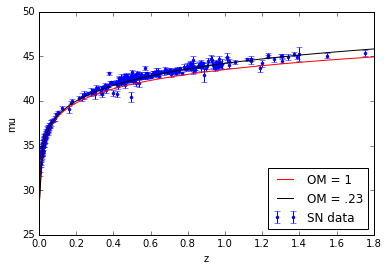

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from math import log10
%matplotlib inline

with open("SN.dat") as textfile:
    lines = [line.split() for line in textfile]

redshift = []
mu = []
sigma = []

for i in range(1,293):
    redshift.append(lines[i][1])
    mu.append(float(lines[i][2]))
    sigma.append(float(lines[i][3]))

def Ez1(z):
    Ez = ((1+z)**(3))** (1.0/2)
    return Ez

def DC0(z):
    return (3000)*(1/Ez1(z))

def DC1(z):
    DC = quad(DC0, 0, z)
    return DC[0]

def DL1(z):
    DL = DC1(z) * (1 + z)
    return DL
    
def fmu(z):
    fmu = 25 - 5*log10(.7) + 5*log10(DL1(z))
    return fmu

##
##
##

#def Ez2(z):
#    Ez = ( ((.23 * (1+z)**(3)) + ((1 - .23) * (1+z)**(2))) ** (1.0/2))
#    return Ez

def Ez2(z):
    Ez =  ((.23 * (1+z)**(3)) + (1 - .23)) ** (1.0/2)
    return Ez

def DC2(z):
    return (3000)*(1.0/Ez2(z))

def DC3(z):
    DC = quad(DC2, 0, z)
    return DC[0]

def DL2(z):
    DL = DC3(z) * (1 + z)
    return DL

def fmu2(z):
    fmu = 25 - 5*log10(.7) + 5*log10(DL2(z))
    return fmu

z = np.linspace(0.001,1.8,100)

mu1 = []
for i in range(100):
    mu1.append(fmu(z[i]))
    
mu2 = []
for i in range(100):
    mu2.append(fmu2(z[i]))

    
plt.errorbar(np.array(redshift), np.array(mu), yerr = np.array(sigma), marker = '.', linestyle = 'None', color ='b', label ='SN data')
plt.ylabel('mu')
plt.xlabel('z')
plt.plot(z, mu1, color ='r', label = 'OM = 1')
plt.plot(z, mu2, color = 'black', label = 'OM = .23')  
plt.legend(loc = 'lower right')
#plt.ylim(0,50)
plt.show()

2b)

The difference between the OM = 1 and the OM = .23 is that the mu values associated with the OM = 1 line are lower than the OM = .23 mu values. The OM = .23 values fit the curve of the data better than the OM = 1 data values.

In [2]:
from scipy.optimize import fmin


def Ez(z, h, OM):
    Ez =  ((OM * (1+z)**(3)) + (1 - OM)) ** (1.0/2)
    return Ez

def DC0(z, h, OM):
    return (3000.0)*(1.0/Ez(z,h,OM))

def DC1(z, h, OM):
    DC = quad(DC0, 0.0, z, args=(h, OM))
    return DC[0]

def DL(z, h, OM):
    DL = DC1(z, h, OM) * (1 + z)
    return DL

def fmu2(z, h, OM):
    fmu = 25 - 5*log10(h) + 5*log10(DL(z, h, OM))
    return fmu

znew, munew, sigmanew = np.loadtxt('SN.dat', usecols=(1,2,3), unpack=True)


def chi_2(params, zdata, mudata, sigmadata):
    h, OM = params
    mun = []
    for i in range(len(zdata)):
            mun.append(fmu2(zdata[i], h, OM))
    chi = []
    for j in range(len(mun)):
        duh = (((mudata[j] - mun[j])**2) / (sigmadata[j]**2))
        chi.append(duh)
    return np.sum(chi)

In [3]:
p0 = ([0.7, 0.23])
opt = fmin(chi_2, p0, args=(znew, munew, sigmanew))
print opt

Optimization terminated successfully.
         Current function value: 393.490323
         Iterations: 33
         Function evaluations: 61
[ 0.63051212  0.31830284]


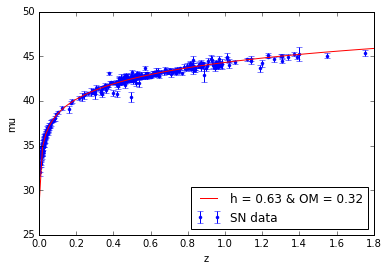

In [4]:
mu_ = []
for i in range(100):
    mu_.append(fmu2(z[i], opt[0], opt[1]))

plt.errorbar(znew, munew, yerr=sigmanew, fmt='.', label = 'SN data')    
plt.plot(z, mu_, 'r', label = 'h = 0.63 & OM = 0.32')
plt.xlabel("z")
plt.ylabel("mu")
plt.legend(loc = 'lower right')
plt.show()

In [58]:
import emcee

def lnprob(params, znew, munew, sigmanew):
    h, OM = params
    if OM < 0 or OM > 1:
        return -1e20
    if h < 0 or h > 1:
        return -1e20
    return -0.5 * chi_2(params, znew, munew, sigmanew)

ndim = 2
nwalkers = 10

p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(znew, munew, sigmanew))

#pos, prob, state = sampler.run_mcmc(p0, 10)

#sampler.reset()

sampler.run_mcmc(pos, 100, rstate0=state)



#print("Mean acceptance fraction: {0:.3f}"
#                .format(np.mean(sampler.acceptance_fraction)))


(array([[ 0.63246533,  0.31872412],
        [ 0.63372844,  0.3095958 ],
        [ 0.62943377,  0.30389899],
        [ 0.62612455,  0.32090579],
        [ 0.624491  ,  0.34264405],
        [ 0.62671901,  0.31469032],
        [ 0.62969629,  0.33791404],
        [ 0.63147595,  0.33784402],
        [ 0.62437469,  0.35165842],
        [ 0.62028685,  0.36118996]]),
 array([-196.88627668, -196.87167   , -197.33785999, -197.27465704,
        -197.12933325, -197.43547915, -197.19874363, -197.63809182,
        -197.2898841 , -197.86069682]),
 ('MT19937', array([3836834274, 3732677604, 2828914948, 1733529208, 2587064595,
          667907237, 3077624243, 2209533484,   37983462, 1165774267,
         3762546886, 2098417473, 3576501184, 1191662258, 2048353106,
         1804760172, 3929527004, 3112112147,  576342462,  265979502,
         2295510085,  386791544, 2790716975,  901851646, 2873437712,
         1825799920, 2672501840,  598066765, 3746379552, 2458414383,
         1058043628, 2317813482,  791

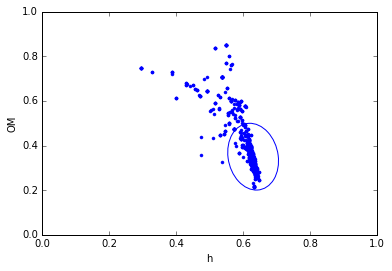

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
%matplotlib inline
circle = Ellipse((.63,.35),.15, .3, 5, color = 'b', fill = False)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot(sampler.flatchain[:,0], sampler.flatchain[:,1], marker = '.', linestyle = 'None')
plt.xlabel('h')
plt.ylabel('OM')
plt.xlim(0,1)
plt.ylim(0,1)

plt.show()

4a)

We do not search for the minimum, we search for the maximum

4c)

MCMC lets us see the errors on thr hubble constant and the omega m.

4d)

I get a hubble constant of around 0.63 +/- 0.075, an omega m of around 0.35 +/- 0.15, and an omega lambda of around .65.